
Analyzing Numerical Column: total_bill
Mean: 19.78594262295082
Median: 17.795
Mode: 13.42
Standard Deviation: 8.902411954856856
Variance: 79.25293861397827
Range: 47.74


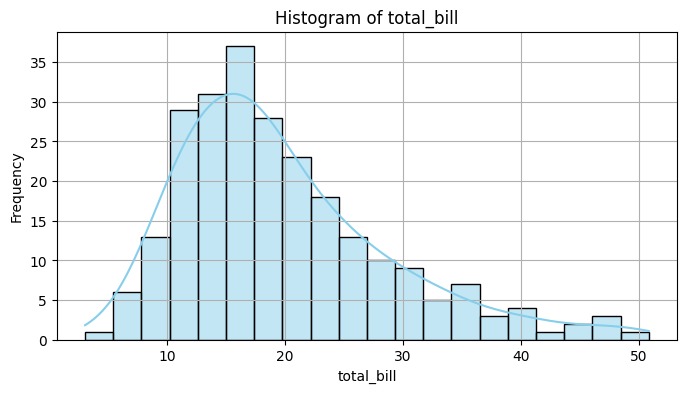

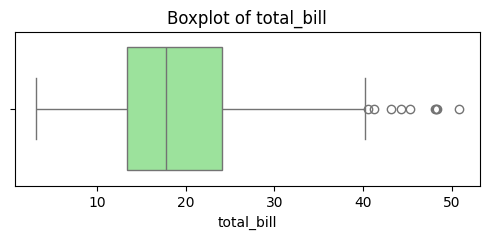


Number of outliers detected in 'total_bill': 9
     total_bill
59        48.27
102       44.30
142       41.19
156       48.17
170       50.81
182       45.35
184       40.55
197       43.11
212       48.33

Analyzing Categorical Column: day
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


C:\Users\bhatt\AppData\Local\Temp\ipykernel_18868\1017769745.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_col], palette='pastel')


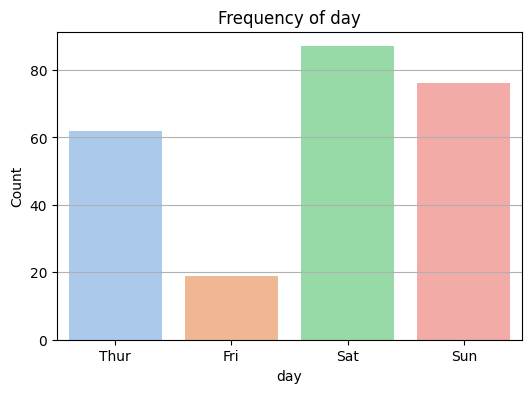

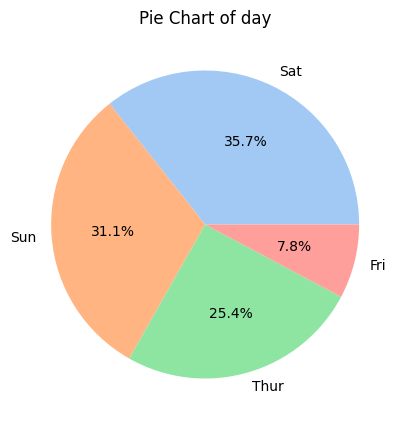

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your dataset path or use an inbuilt one)
df = sns.load_dataset("tips")  

# ---- Step 1: Select a numerical column ----
num_col = 'total_bill'  
print(f"\nAnalyzing Numerical Column: {num_col}")

# ---- Step 2: Compute statistics ----
mean_val = df[num_col].mean()
median_val = df[num_col].median()
mode_val = df[num_col].mode().values[0]
std_dev = df[num_col].std()
variance = df[num_col].var()
value_range = df[num_col].max() - df[num_col].min()

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {value_range}")

# ---- Step 3: Histogram ----
plt.figure(figsize=(8, 4))
sns.histplot(df[num_col], kde=True, bins=20, color='skyblue')
plt.title(f'Histogram of {num_col}')
plt.xlabel(num_col)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# ---- Step 4: Boxplot ----
plt.figure(figsize=(6, 2))
sns.boxplot(x=df[num_col], color='lightgreen')
plt.title(f'Boxplot of {num_col}')
plt.show()

# ---- Step 5: Outlier Detection using IQR ----
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[num_col] < lower_bound) | (df[num_col] > upper_bound)]

print(f"\nNumber of outliers detected in '{num_col}': {len(outliers)}")
print(outliers[[num_col]])

# ---- Step 6: Select a categorical variable ----
cat_col = 'day'  # Replace with your column
print(f"\nAnalyzing Categorical Column: {cat_col}")

# ---- Step 7: Frequency count ----
cat_counts = df[cat_col].value_counts()
print(cat_counts)

# ---- Step 8: Bar chart ----
plt.figure(figsize=(6, 4))
sns.countplot(x=df[cat_col], palette='pastel')
plt.title(f'Frequency of {cat_col}')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Optional: Pie chart
plt.figure(figsize=(5, 5))
plt.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title(f'Pie Chart of {cat_col}')
plt.show()


First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


C:\Users\bhatt\AppData\Local\Temp\ipykernel_18868\4166977223.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x_col, y=y_col,  palette='deep')


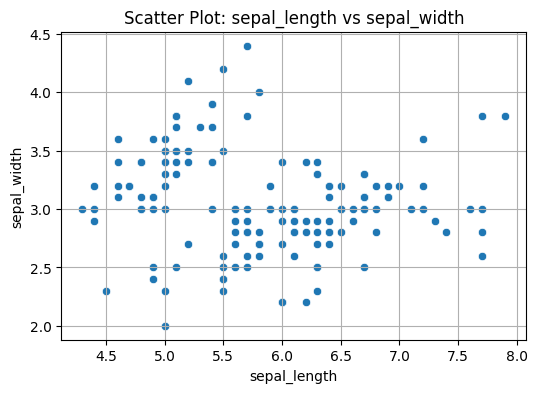


Pearson Correlation between sepal_length and sepal_width: -0.118

Covariance Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


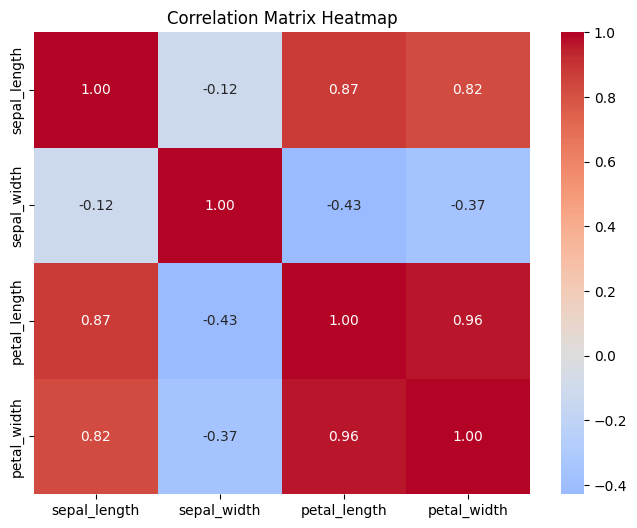

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset from Seaborn
df = sns.load_dataset("iris")
df=df.select_dtypes(include='number')
# ---- Step 1: Display first few rows ----
print("First 5 rows of the dataset:")
print(df.head())

# ---- Step 2: Select two numerical columns ----
x_col = 'sepal_length'
y_col = 'sepal_width'

# ---- Step 3: Scatter plot of two variables ----
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x=x_col, y=y_col,  palette='deep')
plt.title(f'Scatter Plot: {x_col} vs {y_col}')
plt.grid(True)
plt.show()

# ---- Step 4: Calculate Pearson Correlation Coefficient ----
pearson_corr = df[x_col].corr(df[y_col])
print(f"\nPearson Correlation between {x_col} and {y_col}: {pearson_corr:.3f}")

# ---- Step 5: Compute Covariance Matrix ----
cov_matrix = df.cov()
print("\nCovariance Matrix:")
print(cov_matrix)

# ---- Step 6: Compute Correlation Matrix ----
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# ---- Step 7: Visualize Correlation Matrix using Heatmap ----
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


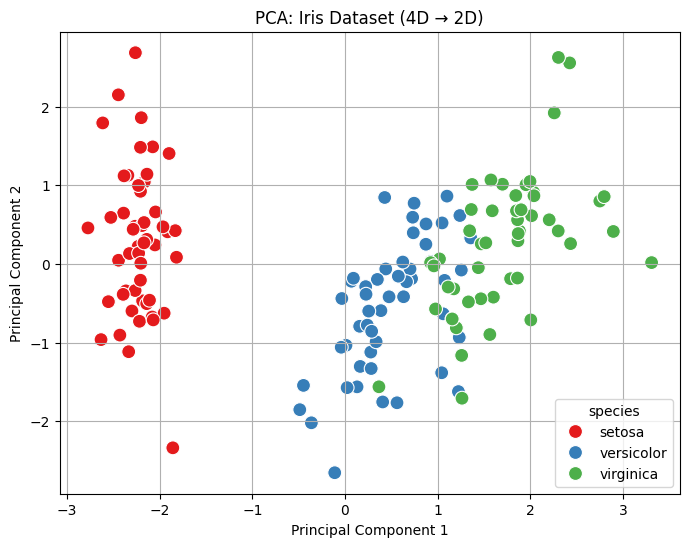


Explained Variance Ratio:
PC1: 72.96%
PC2: 22.85%


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ---- Step 1: Load the Iris dataset ----
df = sns.load_dataset("iris")

# ---- Step 2: Extract features and labels ----
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]
y = df['species']

# ---- Step 3: Standardize the features ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Step 4: Apply PCA to reduce from 4D to 2D ----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ---- Step 5: Create a new DataFrame for visualization ----
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

# ---- Step 6: Visualize the result ----
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='Set1', s=100)
plt.title('PCA: Iris Dataset (4D → 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# ---- Step 7: Explained Variance Ratio ----
print("\nExplained Variance Ratio:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.2%}")


In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

iris = load_iris()
X = iris.data  
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def cls_knn(X_train, X_test, y_train, y_test, k_values, weighted=False):
    results = {}
    for k in k_values:
        if weighted:
            # Weighted k-NN
            knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
        else:
            # Regular k-NN
            knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')

        # Train the model
        knn.fit(X_train, y_train)

        # Make predictions
        y_pred = knn.predict(X_test)
        # Calculate accuracy and F1-score
        accuracy = accuracy_score(y_test, y_pred)

        # Weighted F1-score for multi-class
        f1 = f1_score(y_test, y_pred, average='weighted')
        results[k] = {'accuracy': accuracy, 'f1_score': f1}

    return results

k_values = [1, 3, 5]

print("Regular k-NN Results:")
regular_results = cls_knn(X_train, X_test, y_train, y_test, k_values, weighted=False)

for k, metrics in regular_results.items():
    print(f"k={k}: Accuracy={metrics['accuracy']:.2f}, F1-Score={metrics['f1_score']:.2f}")


print("\nWeighted k-NN Results:")
weighted_results = cls_knn(X_train, X_test, y_train, y_test, k_values, weighted=True)

for k, metrics in weighted_results.items():
    print(f"k={k}: Accuracy={metrics['accuracy']:.2f}, F1-Score={metrics['f1_score']:.2f}")

print("regular_results:", regular_results)
print("weighted_results:", weighted_results)

print("\nComparison of Regular k-NN and Weighted k-NN:")

for k in k_values:
    regular_acc = regular_results[k]['accuracy']
    weighted_acc = weighted_results[k]['accuracy']
    
    print(f"k={k}: Regular k-NN Accuracy={regular_acc:.2f}, Weighted k-NN Accuracy={weighted_acc:.2f}")

Regular k-NN Results:
k=1: Accuracy=1.00, F1-Score=1.00
k=3: Accuracy=1.00, F1-Score=1.00
k=5: Accuracy=1.00, F1-Score=1.00

Weighted k-NN Results:
k=1: Accuracy=1.00, F1-Score=1.00
k=3: Accuracy=1.00, F1-Score=1.00
k=5: Accuracy=1.00, F1-Score=1.00
regular_results: {1: {'accuracy': 1.0, 'f1_score': 1.0}, 3: {'accuracy': 1.0, 'f1_score': 1.0}, 5: {'accuracy': 1.0, 'f1_score': 1.0}}
weighted_results: {1: {'accuracy': 1.0, 'f1_score': 1.0}, 3: {'accuracy': 1.0, 'f1_score': 1.0}, 5: {'accuracy': 1.0, 'f1_score': 1.0}}

Comparison of Regular k-NN and Weighted k-NN:
k=1: Regular k-NN Accuracy=1.00, Weighted k-NN Accuracy=1.00
k=3: Regular k-NN Accuracy=1.00, Weighted k-NN Accuracy=1.00
k=5: Regular k-NN Accuracy=1.00, Weighted k-NN Accuracy=1.00


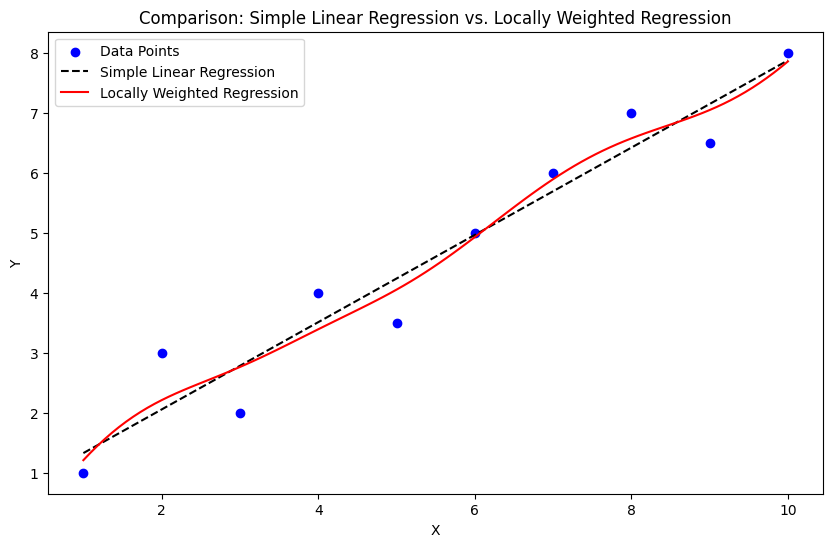

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def gaussian_kernel(x, x_query, tau):
    return np.exp(- (x - x_query) ** 2 / (2 * tau ** 2))

def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]  # Add bias term (Intercept)
    x_query_b = np.array([1, x_query])  # Query point with bias term
    
    W = np.diag(gaussian_kernel(X, x_query, tau))  # Compute weights
    
    # Compute theta: (X^T W X)^-1 X^T W y
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    
    return x_query_b @ theta  # Return prediction

# Complex Dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 8])

# Query points for LWR
X_query = np.linspace(1, 10, 100)

tau = 1.0  # Bandwidth parameter   

# Compute LWR predictions
y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])

# Simple Linear Regression
lin_reg = LinearRegression()
X_reshaped = X.reshape(-1, 1)
lin_reg.fit(X_reshaped, y)
y_lin = lin_reg.predict(X_query.reshape(-1, 1))

# Visualizing
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_query, y_lin, color='black', linestyle='dashed', label='Simple Linear Regression')
plt.plot(X_query, y_lwr, color='red', label='Locally Weighted Regression')
plt.title("Comparison: Simple Linear Regression vs. Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

C:\Users\bhatt\AppData\Local\Temp\ipykernel_18868\129410818.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


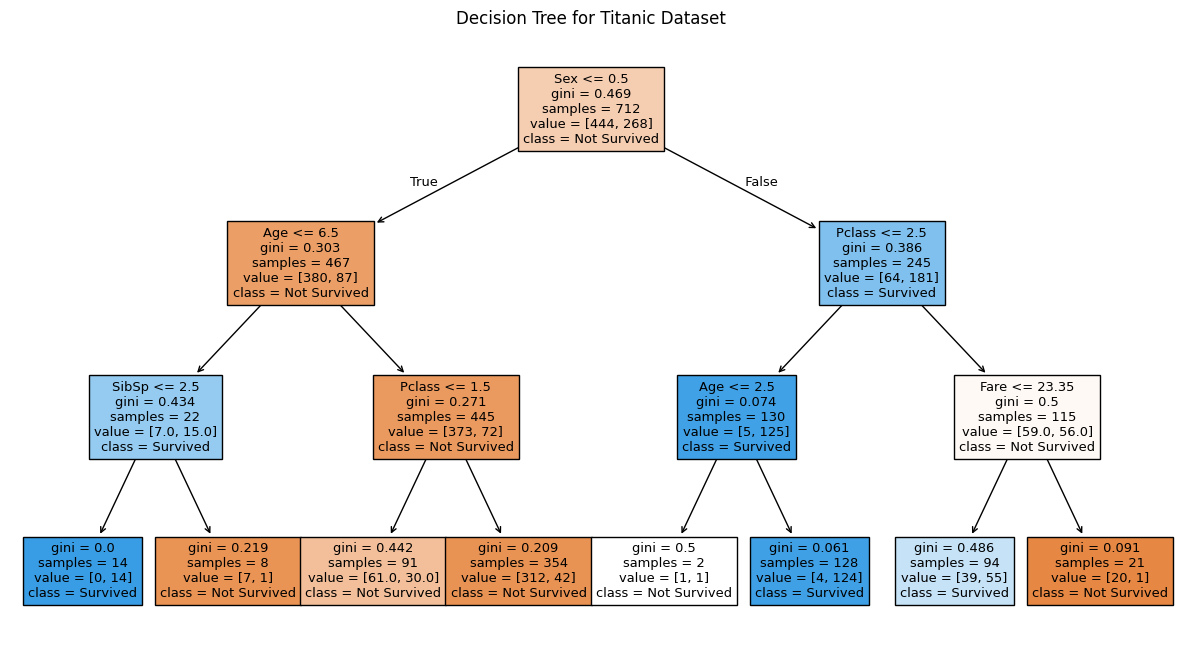

Model Evaluation Metrics:
Accuracy  : 0.7989
Precision : 0.7969
Recall    : 0.6892
F1 Score  : 0.7391


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df = df[features + ['Survived']]

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree for Titanic Dataset")
plt.show()

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

#Step 1
iris = load_iris()
X = iris.data
y = iris.target

#Step 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Step 3
model = GaussianNB()
model.fit(X_train, y_train)


#Step 4
y_pred = model.predict(X_test)

#Step 5
accuracy = accuracy_score(y_test,y_pred)
print(f"The accuracy of the naive-bayes classifier: {accuracy}")
print("\n Classification refort \n" , classification_report(y_test, y_pred, target_names = iris.target_names))

The accuracy of the naive-bayes classifier: 1.0

 Classification refort 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



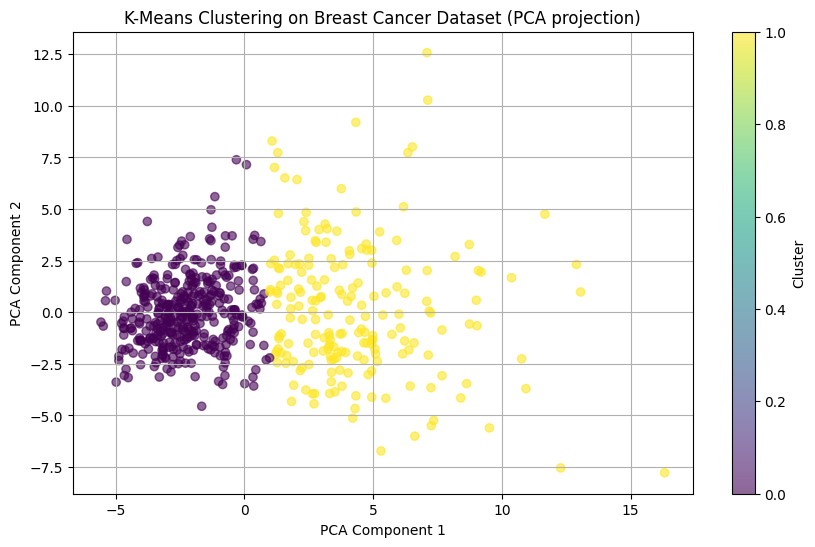

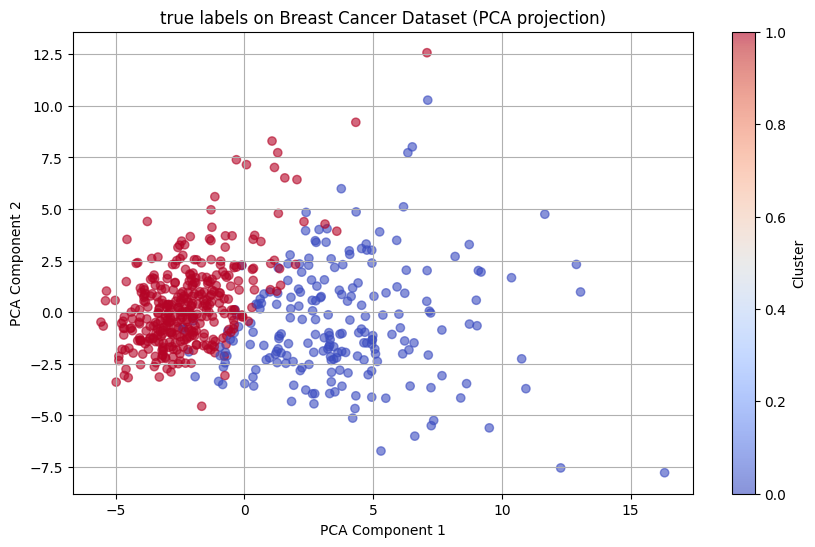

📊 Clustering Evaluation (confusion matrix vs. true labels):
[[ 36 176]
 [339  18]]
              precision    recall  f1-score   support

           0       0.10      0.17      0.12       212
           1       0.09      0.05      0.07       357

    accuracy                           0.09       569
   macro avg       0.09      0.11      0.09       569
weighted avg       0.09      0.09      0.09       569



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

# ---- Step 1: Load the dataset ----
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

# ---- Step 2: Feature scaling ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Step 3: Apply K-Means ----
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# ---- Step 4: PCA for 2D visualization ----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ---- Step 5: Plot clustering results ----
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering on Breast Cancer Dataset (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("true labels on Breast Cancer Dataset (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# ---- Step 6: Evaluate clustering (optional) ----
print("📊 Clustering Evaluation (confusion matrix vs. true labels):")
print(confusion_matrix(y, labels))
print(classification_report(y, labels))
